In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv(r"C:\Users\otusa\OneDrive\Desktop\Data Science Projects\3..Time Series Analysis-20230513T194720Z-001\3..Time Series Analysis\BAJFINANCE.csv")

In [3]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [4]:
data.set_index('Date', inplace=True)

In [5]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


<Axes: xlabel='Date'>

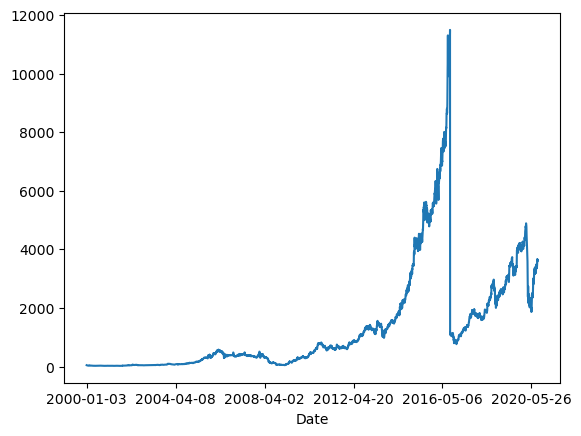

In [6]:
data['VWAP'].plot()

In [7]:
"Next we want to do feature engineering"

'Next we want to do feature engineering'

In [8]:
data.shape

(5070, 14)

In [9]:
data.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [10]:
"For simplicity we drop nas'"

"For simplicity we drop nas'"

In [11]:
data.dropna(inplace=True)

In [12]:
data.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [13]:
data.shape

(2291, 14)

In [14]:
df=data.copy()

In [15]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [16]:
"Next we want to prepare our data for time series forcasting"

'Next we want to prepare our data for time series forcasting'

In [17]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [18]:
lag_features = ['High', 'Low', 'Volume', 'Turnover', 'Trades']
window1=3
window2=7

In [44]:
for feature in lag_features: 
    data[feature+' rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+' rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [45]:
for feature in lag_features: 
    data[feature+' rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+' rolling_std_7']=data[feature].rolling(window=window2).std()

In [46]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High rolling_std_3,High rolling_std_7,Low rolling_std_3,Low rolling_std_7,Volume rolling_std_3,Volume rolling_std_7,Turnover rolling_std_3,Turnover rolling_std_7,Trades rolling_std_3,Trades rolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,...,11.434196,NaN,7.456597,NaN,15640.051929,NaN,9.982094e+11,NaN,557.373603,NaN
2011-06-14,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,5597,...,11.473593,NaN,2.002707,NaN,15088.183102,NaN,9.595224e+11,NaN,656.385050,NaN
2011-06-15,BAJFINANCE,EQ,622.10,612.00,623.00,598.10,605.00,601.70,606.90,12590,...,3.165833,NaN,11.643560,NaN,4575.812970,NaN,2.733211e+11,NaN,150.639747,NaN


In [47]:
data.isna().sum()

Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                     0
Deliverable Volume         0
%Deliverble                0
High rolling_mean_3        2
High rolling_mean_7        6
Low rolling_mean_3         2
Low rolling_mean_7         6
Volume rolling_mean_3      2
Volume rolling_mean_7      6
Turnover rolling_mean_3    2
Turnover rolling_mean_7    6
Trades rolling_mean_3      2
Trades rolling_mean_7      6
High rolling_std_3         2
High rolling_std_7         6
Low rolling_std_3          2
Low rolling_std_7          6
Volume rolling_std_3       2
Volume rolling_std_7       6
Turnover rolling_std_3     2
Turnover rolling_std_7     6
Trades rolling_std_3       2
Trades rolling_std_7       6
dtype: int64

In [48]:
data.isna()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High rolling_std_3,High rolling_std_7,Low rolling_std_3,Low rolling_std_7,Volume rolling_std_3,Volume rolling_std_7,Turnover rolling_std_3,Turnover rolling_std_7,Trades rolling_std_3,Trades rolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2011-06-10,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2011-06-13,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,True
2011-06-14,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,True
2011-06-15,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-08-26,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-08-27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
data.dropna(inplace=True)

In [50]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High rolling_mean_3', 'High rolling_mean_7',
       'Low rolling_mean_3', 'Low rolling_mean_7', 'Volume rolling_mean_3',
       'Volume rolling_mean_7', 'Turnover rolling_mean_3',
       'Turnover rolling_mean_7', 'Trades rolling_mean_3',
       'Trades rolling_mean_7', 'High rolling_std_3', 'High rolling_std_7',
       'Low rolling_std_3', 'Low rolling_std_7', 'Volume rolling_std_3',
       'Volume rolling_std_7', 'Turnover rolling_std_3',
       'Turnover rolling_std_7', 'Trades rolling_std_3',
       'Trades rolling_std_7'],
      dtype='object')

In [51]:
ind_features=['High rolling_mean_3', 'High rolling_mean_7',
       'Low rolling_mean_3', 'Low rolling_mean_7', 'Volume rolling_mean_3',
       'Volume rolling_mean_7', 'Turnover rolling_mean_3',
       'Turnover rolling_mean_7', 'Trades rolling_mean_3',
       'Trades rolling_mean_7', 'High rolling_std_3', 'High rolling_std_7',
       'Low rolling_std_3', 'Low rolling_std_7', 'Volume rolling_std_3',
       'Volume rolling_std_7', 'Turnover rolling_std_3',
       'Turnover rolling_std_7', 'Trades rolling_std_3',
       'Trades rolling_std_7']

In [63]:
train_data=data[0:1800]
test_data=data[1800:]

In [64]:
train_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High rolling_std_3,High rolling_std_7,Low rolling_std_3,Low rolling_std_7,Volume rolling_std_3,Volume rolling_std_7,Turnover rolling_std_3,Turnover rolling_std_7,Trades rolling_std_3,Trades rolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-17,BAJFINANCE,EQ,581.15,593.00,593.00,577.00,582.00,583.70,582.90,10410,...,28.023799,19.998696,13.630970,22.484643,13366.873544,13241.764887,7.859563e+11,8.221758e+11,235.606310,422.114800
2011-06-20,BAJFINANCE,EQ,583.70,570.00,582.05,553.80,570.00,571.90,566.55,15181,...,35.912405,25.619245,12.322337,26.265769,12798.677679,11990.324578,7.648574e+11,7.318860e+11,238.265258,406.056177
2011-06-21,BAJFINANCE,EQ,571.90,572.00,588.00,572.00,575.00,578.35,582.81,4289,...,5.481864,25.343389,12.209832,24.780650,5459.925915,10695.832533,3.065172e+11,6.266742e+11,148.021395,218.921164
2011-06-22,BAJFINANCE,EQ,578.35,576.00,585.75,562.25,566.00,566.10,574.92,6652,...,3.004302,26.244959,9.107735,22.547112,5729.503673,10389.745292,3.209172e+11,6.112641e+11,154.305973,220.517357
2011-06-23,BAJFINANCE,EQ,566.10,561.25,572.00,560.25,571.95,569.90,566.81,3206,...,8.661457,27.156519,6.286560,14.501679,1762.175455,10699.039921,1.020574e+11,6.325777e+11,46.306947,228.303787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-12,BAJFINANCE,EQ,2600.75,2617.95,2636.95,2516.10,2588.90,2594.00,2577.54,2682340,...,51.662632,51.914260,40.110047,66.236890,902593.256279,835125.949241,2.325644e+14,2.156391e+14,31297.267202,34656.587966
2018-09-14,BAJFINANCE,EQ,2594.00,2630.50,2683.50,2626.25,2678.00,2672.20,2651.42,1795131,...,23.795710,47.776811,55.315527,61.033875,783655.301341,800730.132185,2.018671e+14,2.036245e+14,31471.093038,33742.606344
2018-09-17,BAJFINANCE,EQ,2672.20,2660.00,2660.00,2588.25,2596.00,2604.60,2613.75,1455320,...,23.275363,44.294307,55.950343,57.040858,633533.662063,818929.309318,1.593010e+14,2.094265e+14,35128.684296,34854.254176


In [30]:
"Understanding the intuition behind the Arima Model"
ARIMA = AR+I+MA= AUTOREGRSSSIVE MODEL + INTEGRATING + MOVING AVERAGE
This ARIMA model produces models paramedters - (P,d,q)
we use partial autocorrelation factor used to ccompute P
We use differencing conecpts to compute d  
we use autocorrelation factor to compute q 

AUTO ARIMA = the automated machine learning model 

SyntaxError: cannot assign to expression (1025465414.py, line 2)

In [131]:
!pip install pmdarima==1.7.1

  Using cached pmdarima-1.7.1.tar.gz (1.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Cython-0.29.17-py2.py3-none-any.whl (971 kB)
  Using cached statsmodels-0.11.1.tar.gz (15.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [619 lines of output]
  Ignoring numpy: markers 'python_version == "3.5"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7"' don't match your environment
    Using cached setuptools-67.7.2-py3-none-any.whl (1.1 MB)
    Using cached wheel-0.40.0-py3-none-any.whl (64 kB)
    Using cached Cython-0.29.34-py2.py3-none-any.whl (988 kB)
    Using cached numpy-1.17.5.zip (6.4 MB)
    Preparing metadata (setup.py): started
    Preparing metadata (setup.py): finished with status 'done'
    Using cached scipy-1.10.1-cp310-cp310-win_amd64.whl (42.5 MB)
    Using cached scipy-1.10.0-cp310-cp310-win_amd64.whl (42.5 MB)
    Using cached scipy-1.9.3-cp310-cp310-win_amd64.whl (40.1 MB)
    Using cached scipy-1.9.2-cp310-cp310-win_amd64.whl (40.1 MB)
    Using ca

In [130]:
C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip setuptools

SyntaxError: unexpected character after line continuation character (836806797.py, line 1)

In [102]:
import pmdarima as pm

In [103]:
from pmdarima import auto_arima

In [104]:
import warnings 
warnings.filterwarnings('ignore')

In [108]:
model=auto_arima(y = train_data['VWAP'], x = train_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25014.052, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25016.007, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25016.011, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25012.085, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.59 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.115 seconds


In [109]:
model.fit(y=  train_data['VWAP'] ,x = train_data[ind_features] )

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [100]:
test_data[ind_features]

,High rolling_mean_3,High rolling_mean_7,Low rolling_mean_3,Low rolling_mean_7,Volume rolling_mean_3,Volume rolling_mean_7,Turnover rolling_mean_3,Turnover rolling_mean_7,Trades rolling_mean_3,Trades rolling_mean_7,High rolling_std_3,High rolling_std_7,Low rolling_std_3,Low rolling_std_7,Volume rolling_std_3,Volume rolling_std_7,Turnover rolling_std_3,Turnover rolling_std_7,Trades rolling_std_3,Trades rolling_std_7
Date,,,,,,,,,,,,,,,,,,,,
2018-09-21,2594.050000,2633.057143,2390.050000,2494.714286,3.031576e+06,2.626454e+06,7.443086e+14,6.657208e+14,105301.000000,101785.142857,35.366545,44.025300,232.684190,169.418957,2.365487e+06,1.542934e+06,5.497978e+14,3.621280e+14,62050.767546,44630.803576
2018-09-24,2525.716667,2597.864286,2259.916667,2438.478571,5.147870e+06,3.260813e+06,1.201545e+15,7.898335e+14,180665.666667,123322.428571,91.717642,87.595109,197.453554,204.885726,2.997646e+06,2.505959e+06,6.518465e+14,5.484906e+14,102868.581911,83127.736805
2018-09-25,2436.600000,2554.064286,2157.950000,2390.550000,6.362149e+06,3.668678e+06,1.460442e+15,8.706094e+14,219049.666667,133182.857143,113.985624,130.795348,29.456196,222.210561,1.248205e+06,2.625602e+06,2.562524e+14,5.726773e+14,58620.314912,87525.055815
2018-09-26,2368.916667,2506.985714,2214.766667,2343.242857,5.354775e+06,3.802053e+06,1.213548e+15,8.934222e+14,201048.000000,139646.857143,47.839349,135.660064,69.828958,197.549847,2.539637e+06,2.536778e+06,5.575221e+14,5.573108e+14,82068.926836,84269.729754
2018-09-27,2335.900000,2458.900000,2222.616667,2286.657143,3.687482e+06,3.993621e+06,8.402166e+14,9.288219e+14,140554.666667,146195.857143,16.013354,131.989021,63.037495,170.559179,1.602428e+06,2.375534e+06,3.608028e+14,5.262991e+14,48292.028383,78494.061538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,3538.333333,3475.992857,3430.350000,3389.157143,6.229009e+06,5.134360e+06,2.192348e+15,1.776493e+15,212607.666667,173809.285714,111.840660,89.327396,69.777271,61.471880,3.613401e+06,2.348888e+06,1.315344e+15,8.608028e+14,125273.490429,81831.863468
2020-08-26,3627.333333,3519.921429,3514.016667,3434.671429,7.574994e+06,5.419319e+06,2.708305e+15,1.901918e+15,254151.666667,181048.285714,100.081633,116.819954,115.027609,100.638138,1.987080e+06,2.403611e+06,7.237865e+14,8.886997e+14,74234.798338,82982.637290
2020-08-27,3678.466667,3552.842857,3579.133333,3467.500000,7.043513e+06,5.405723e+06,2.548738e+15,1.912267e+15,238727.666667,182218.571429,25.064982,122.216500,62.320569,111.614377,2.641848e+06,2.408580e+06,9.306171e+14,8.850381e+14,91269.616085,82597.470913


In [110]:
model.predict(n_periods=len(test_data), x = test_data[ind_features])

1800    2534.22
1801    2534.22
1802    2534.22
1803    2534.22
1804    2534.22
         ...   
2274    2534.22
2275    2534.22
2276    2534.22
2277    2534.22
2278    2534.22
Length: 479, dtype: float64

In [112]:
test_data['Forecast_ARIMA']=forecast

In [113]:
forecast

1800    2534.22
1801    2534.22
1802    2534.22
1803    2534.22
1804    2534.22
         ...   
2274    2534.22
2275    2534.22
2276    2534.22
2277    2534.22
2278    2534.22
Length: 479, dtype: float64

<Axes: xlabel='Date'>

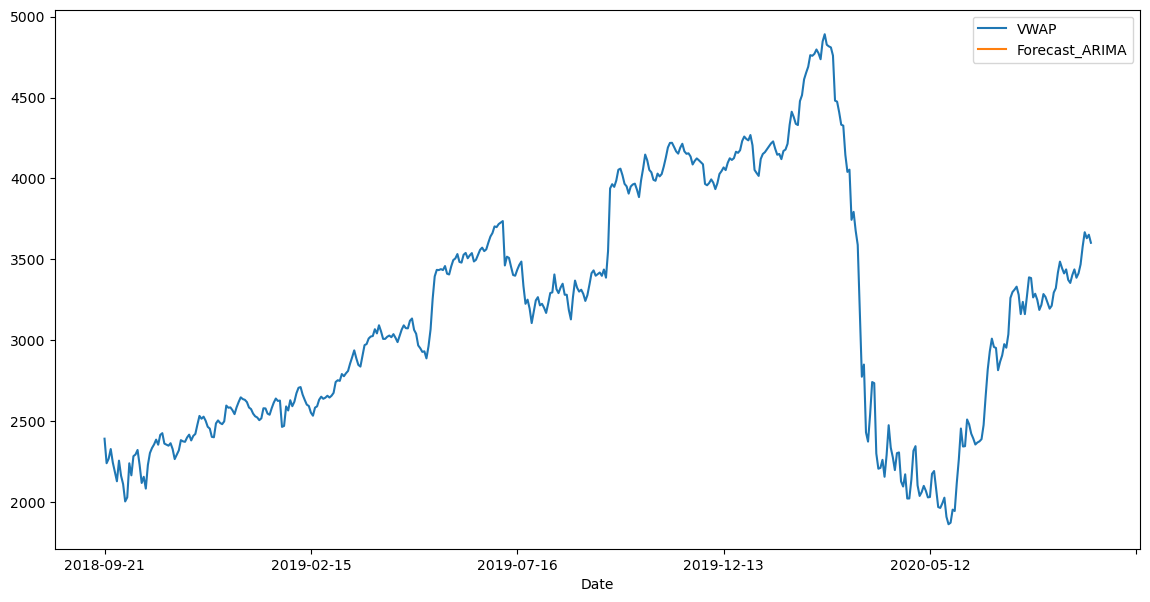

In [114]:
test_data[['VWAP','Forecast_ARIMA']].plot(figsize = (14,7))

In [90]:
forecast

1800    2534.22
1801    2534.22
1802    2534.22
1803    2534.22
1804    2534.22
         ...   
2274    2534.22
2275    2534.22
2276    2534.22
2277    2534.22
2278    2534.22
Length: 479, dtype: float64

In [ ]:
#now we wnat to evaluate our model

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [115]:
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA']))

ValueError: Input contains NaN.

In [97]:
test_data.isna().sum()

Symbol                       0
Series                       0
Prev Close                   0
Open                         0
High                         0
Low                          0
Last                         0
Close                        0
VWAP                         0
Volume                       0
Turnover                     0
Trades                       0
Deliverable Volume           0
%Deliverble                  0
High rolling_mean_3          0
High rolling_mean_7          0
Low rolling_mean_3           0
Low rolling_mean_7           0
Volume rolling_mean_3        0
Volume rolling_mean_7        0
Turnover rolling_mean_3      0
Turnover rolling_mean_7      0
Trades rolling_mean_3        0
Trades rolling_mean_7        0
High rolling_std_3           0
High rolling_std_7           0
Low rolling_std_3            0
Low rolling_std_7            0
Volume rolling_std_3         0
Volume rolling_std_7         0
Turnover rolling_std_3       0
Turnover rolling_std_7       0
Trades r

In [123]:
import pmdarima
print(pmdarima.__version__)

2.0.3
